# Load data

In [ ]:
import pandas as pd

homeless = pd.read_csv("https://raw.githubusercontent.com/ishtiakrongon/Datacamp-Data_manipulation_with_pandas/main/datasets/homelessness.csv", index_col=0)

homeless.head()

# Inspecting a **DataFrame**

In [ ]:
homeless.info()

In [ ]:
homeless.shape

In [ ]:
homeless.describe()

## Parts of a DataFrame

In [ ]:
homeless.values

In [ ]:
homeless.columns

In [ ]:
homeless.index

## Sorting and subsetting

In [ ]:
# Sort homelessness by individual
homeless_ind = homeless.sort_values('individuals')
homeless_ind.head()

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434.0,205.0,577601
34,West North Central,North Dakota,467.0,75.0,758080
7,South Atlantic,Delaware,708.0,374.0,965479
39,New England,Rhode Island,747.0,354.0,1058287
45,New England,Vermont,780.0,511.0,624358


In [ ]:
# Sort homelessness by descending family members
homeless_fam = homeless.sort_values('family_members', ascending = False)
homeless_fam.head()
#False gir høyest til lavest.

In [ ]:
# Sort homeless first by region (ascending), and then by number of family members (descending). Save this as homeless_reg_fam
homeless_reg_fam = homeless.sort_values(['region', 'family_members'], ascending = [True, False])
homeless_reg_fam.head()

In [ ]:
# Sort homelessness by individual
# 1 [] gir ikke verdi ut som PandaFrame. Må bruke to [[]]

individuals = homeless[['individuals']]
individuals.head()

In [ ]:
# Sort homelessness by region, then descending family members
state_fam = homeless[['state', 'family_members']]
state_fam.head()

In [ ]:
# Select only individuals and state columns, in that order.
ind_state = homeless[['individuals', 'state']]
ind_state.head()

In [ ]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homeless[homeless['individuals']> 10000]
ind_gt_10k

In [ ]:
# Filter for rows where region is Mountain
mountain_reg = homeless[homeless['region'] == 'Mountain']
mountain_reg

In [ ]:
# Filter for rows where family_members is less than 1000 And filter region is Pacific
fam_1k_pac = homeless[ (homeless['family_members'] < 1000) &
                      (homeless['region'] == 'Pacific')]
fam_1k_pac

## Subsetting rows by categorical variables

In [ ]:
# Subset for rows in South Atlantic or Mid-Atlantic regions.
# | means or. & means and.
south_mid_atlantic = homeless[ (homeless['region'] == 'South Atlantic') |
                               (homeless['region'] == 'Mid-Atlantic')     ]
south_mid_atlantic.head()

In [ ]:
#Alternativt 2
south_mid_atlantic1 = homeless['region'].isin(["South Atlantic", "Mid-Atlantic"])
homeless[south_mid_atlantic1].head()

In [ ]:
# Filter homelessness for cases where the USA census state is in the list of Mojave states, canu, assigning to mojave_homeless.
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homeless = homeless[homeless['state'].isin(["California", "Arizona", "Nevada", "Utah"])]
mojave_homeless

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259.0,2606.0,7158024
4,Pacific,California,109008.0,20964.0,39461588
28,Mountain,Nevada,7058.0,486.0,3027341
44,Mountain,Utah,1904.0,972.0,3153550


## New columns

In [ ]:
# Add total col as sum of individuals and family_members
homeless['total'] = homeless['individuals'] + homeless['family_members']
# Add p_individuals col as proportion of individuals
homeless['p_individuals'] = homeless['individuals'] / homeless['total']

homeless.head()

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


In [ ]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homeless["indiv_per_10k"] = (homeless['individuals'] /homeless['state_pop'])* 10000


# Subset rows for indiv_per_10k greater than 20
high_homeless = homeless[homeless['indiv_per_10k'] > 20]


# Sort high_homeless by descending indiv_per_10k (høyest til lavest)
high_homeless_srt = high_homeless.sort_values('indiv_per_10k', ascending = False)


# From high_homeless_srt, select the state and indiv_per_10k cols
result = high_homeless_srt[['state', 'indiv_per_10k']]

# See the result
result

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189
47,Washington,21.829195
32,New York,20.392363


# Aggregating DataFrames 🔴

## Load data

In [ ]:
import pandas as pd

sales = pd.read_csv("https://raw.githubusercontent.com/ishtiakrongon/Datacamp-Data_manipulation_with_pandas/main/datasets/sales_subset.csv", index_col=0)

sales.head()


,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [ ]:
sales.info()

In [ ]:
#Print the mean of weekly_sales, and then mean.
sales['weekly_sales'].mean()

23843.95014850566

In [ ]:
#Print the median of weekly_sales
sales['weekly_sales'].median()

12049.064999999999

In [ ]:
# Print the maximum of the date column
(sales['date'].max())


'2012-10-26'

In [ ]:
# Print the minimum of the date column
(sales['date'].min())

'2010-02-05'

In [ ]:
# Import NumPy and create custom IQR function (Short-quartile range, alternative to standard deviation that is helpful if the data contains outliers.)
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median, np.mean, np.std]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176      0.565000
median      16.966667              0.743381      8.099000
mean        15.731978              0.749746      8.082009
std          9.922446              0.059494      0.624355


## Cumulative statistics

In [ ]:
#First make a dataset which contains the sales data for department 1 of store 1.

sales_1 = sales[(sales['store'] ==1) & (sales['department'] == 1)]
sales_1.shape

# Alternativt 2
sales_2 = sales[sales['store'].isin([1]) & sales['department'].isin([1])]
sales_2.head(5)


,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [ ]:
# Sort sales_1 by date in ascending order
sales_1 = sales_1.sort_values('date', ascending = True )
sales_1.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [ ]:
# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1['cum_weekly_sales'] = sales_1['weekly_sales'].cumsum()
sales_1.head()


,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,cum_weekly_sales
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106,24924.50
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106,46752.40
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808,104010.83
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808,121424.77
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808,138982.86


In [ ]:
# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1['cum_max_sales'] = sales_1['weekly_sales'].cummax()
sales_1.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,cum_weekly_sales,cum_max_sales
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106,24924.50,24924.50
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106,46752.40,24924.50
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808,104010.83,57258.43
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808,121424.77,57258.43
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808,138982.86,57258.43


In [ ]:
# See the columns you calculated
sales_1[['date', 'weekly_sales', 'cum_weekly_sales', 'cum_max_sales']].head()


,date,weekly_sales,cum_weekly_sales,cum_max_sales
0,2010-02-05,24924.50,24924.50,24924.50
1,2010-03-05,21827.90,46752.40,24924.50
2,2010-04-02,57258.43,104010.83,57258.43
3,2010-05-07,17413.94,121424.77,57258.43
4,2010-06-04,17558.09,138982.86,57258.43


## Counting, duplicates, unique values

## Dropping duplicates

In [ ]:
sales.head(5)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [ ]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset = ['store', 'type'])
store_types.head(5)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [ ]:
# Drop duplicate store/department combinations
store_dep = sales.drop_duplicates(subset = ['store', 'department'])
store_dep.head(5)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [ ]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset = 'date')
holiday_dates.head(5)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
498,1,A,45,2010-09-10,11.47,True,25.938889,0.677602,7.787
691,1,A,77,2011-11-25,1431.00,True,15.633333,0.854861,7.866
2315,4,A,47,2010-02-12,498.00,True,-1.755556,0.679715,8.623
6735,19,A,39,2012-09-07,13.41,True,22.333333,1.076766,8.193
6810,19,A,47,2010-12-31,-449.00,True,-1.861111,0.881278,8.067


In [ ]:
# Print date col of holiday_dates
holiday_dates[['date']]

,date
498,2010-09-10
691,2011-11-25
2315,2010-02-12
6735,2012-09-07
6810,2010-12-31
6815,2012-02-10
6820,2011-09-09


## Counting categorical variables

In [ ]:
store_types.head(5)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [ ]:
# Count the number of store of each type in store_types
store_counts = store_types['type'].value_counts()
store_counts.head()

In [ ]:
# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize = True)
store_props.head()

In [ ]:
# Count the number of different departments in store_depts, sorting the counts in descending order.
dep_store_sorted = store_dep['department'].value_counts(sort=True)
dep_store_sorted

In [ ]:
# Count the proportion of different departments in store_depts, sorting the proportions in descending order.
dep_store_sorted_prop = store_dep['department'].value_counts(sort=True, normalize = True)
dep_store_sorted_prop

## Grouped summary statistics

In [ ]:
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [ ]:
# Calc total weekly sales
sales_all = sales['weekly_sales'].sum()

In [ ]:
# Subset for type A stores, calc total weekly sales
sales_a = sales[sales['type'] == 'A']['weekly_sales'].sum()
sales_a

In [ ]:
# Subset for type A stores, calc total weekly sales
sales_b = sales[sales['type'] == 'B']['weekly_sales'].sum()
sales_b

In [ ]:
# Subset for type A stores, calc total weekly sales
sales_c = sales[sales['type'] == 'C']['weekly_sales'].sum()
sales_c

In [ ]:
# Get proportion for each type
sales_prop_by_type = [sales_a, sales_b, sales_c] / sales_all
sales_prop_by_type 

array([0.9097747, 0.0902253, 0.       ])

In [ ]:
# Calculations with .groupby()
sales_by_types = sales.groupby('type')['weekly_sales'].sum()
sales_by_types

type
A    2.337163e+08
B    2.317840e+07
Name: weekly_sales, dtype: float64

In [ ]:
sales_by_prop_type1 = sales_by_types / sum(sales_by_types)
sales_by_prop_type1 

In [ ]:
sales.head()

In [ ]:
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum()

In [ ]:
sales_by_type_is_holiday

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64

In [ ]:
sales_by_type_is_holiday1 = sales_by_type_is_holiday / sum(sales_by_type_is_holiday)
sales_by_type_is_holiday1

type  is_holiday
A     False         0.909683
      True          0.000092
B     False         0.090219
      True          0.000006
Name: weekly_sales, dtype: float64

## Multiple grouped summaries

In [ ]:
import numpy as np 

In [ ]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.mean, np.median])
sales_stats

,amin,amax,mean,median
type,,,,
A,-1098.0,293966.05,23674.667242,11943.92
B,-798.0,232558.51,25696.678370,13336.08


In [ ]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
arbeidsledig_og_bensin_per_usd = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([np.min, np.max, np.mean, np.median])
arbeidsledig_og_bensin_per_usd

unemployment                         fuel_price_usd_per_l            \
             amin   amax      mean median                 amin      amax   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348

## Pivot tables

In [ ]:
# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table('weekly_sales', index ='type', aggfunc=[np.mean, np.median])
mean_med_sales_by_type

,mean,median
,weekly_sales,weekly_sales
type,,
A,23674.667242,11943.92
B,25696.678370,13336.08


In [ ]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table('weekly_sales', index = 'type', columns = 'is_holiday')
mean_sales_by_type_holiday

is_holiday,False,True
type,,
A,23768.583523,590.04525
B,25751.980533,810.70500


In [ ]:
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


## Fill in missing values and sum values with pivot tables

In [ ]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table('weekly_sales', index = 'department', columns = 'type', fill_value = 0, margins = True))

# margins is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


# Slicing and Indexing DataFrames 🥳

## Explicit Indexes

## Load data

In [ ]:
temp = pd.read_csv("https://raw.githubusercontent.com/ishtiakrongon/Datacamp-Data_manipulation_with_pandas/main/datasets/temperatures.csv", index_col=0)

temp.head()

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [ ]:
temp.columns
temp.index
#temp.set_index('column name')
#temp.reset_index(drop = true or false)

In [ ]:
temp_c = temp.set_index('city')
#temp_c.reset_index(drop = False).head()

In [ ]:
temp_c.reset_index(drop = True).head()

##**Subsetting with .loc[]**


*   The killer feature for indexes is .loc[]: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.
*   The code for subsetting using .loc[] can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

**pandas is loaded as pd.**
**temp and temp_c are available; the latter is indexed by city.**

In [ ]:
cities = ['Moscow', 'Saint Petersburg']

In [ ]:
temp[temp['city'].isin(['Moscow', 'Saint Petersburg'])].head()
# Husk at vi ønsker å filtrere kolonnen city på Moscow og Saint Petersburg. 
# 1. Vi starter med datasettet og setter en ny filter i datasettet for å velge kolonne. Da vil vi få ut resultatet i tabellformat som under. 

,date,city,country,avg_temp_c
10725,2000-01-01,Moscow,Russia,-7.313
10726,2000-02-01,Moscow,Russia,-3.551
10727,2000-03-01,Moscow,Russia,-1.661
10728,2000-04-01,Moscow,Russia,10.096
10729,2000-05-01,Moscow,Russia,10.357


In [ ]:
temp_c.loc[cities].head()

,date,country,avg_temp_c
city,,,
Moscow,2000-01-01,Russia,-7.313
Moscow,2000-02-01,Russia,-3.551
Moscow,2000-03-01,Russia,-1.661
Moscow,2000-04-01,Russia,10.096
Moscow,2000-05-01,Russia,10.357


## **Setting multi-level indexes**

In [ ]:
temp_cc = temp.set_index(['country', 'city'])
temp_cc

In [ ]:
rows_to_keep = [('Brazil', 'Rio De Janeiro'), ('Pakistan', 'Lahore')]

In [ ]:
temp_cc.loc[rows_to_keep].head()

date  avg_temp_c
country city                                  
Brazil  Rio De Janeiro  2000-01-01      25.974
        Rio De Janeiro  2000-02-01      26.699
        Rio De Janeiro  2000-03-01      26.270
        Rio De Janeiro  2000-04-01      25.750
        Rio De Janeiro  2000-05-01      24.356

## **Sorting by index values**

In [ ]:
temp_cc.sort_index().head()

date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658

In [ ]:
temp_cc.sort_index(level = ['city']).head()

date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547

In [ ]:
temp_cc.sort_index(level = ['country', 'city'], ascending = [True, False]).head()

date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658

# **Slicing and subsetting with .loc and .iloc** 

## Slicing index values


Slicing lets you select consecutive elements of an object using first:last syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the .loc[] method.

Compared to slicing lists, there are a few things to remember.
* You can only slice an index if the index **is sorted** (using .sort_index()). 
* To slice at the **outer level**, first and last can be strings. 
* To slice at **inner levels**, first and last should be tuples.
* If you pass a single slice to .loc[], it will slice the rows.




In [ ]:
temp_cc_sort = temp_cc.sort_index()
temp_cc_sort

date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]

In [ ]:
temp_cc_sort.loc['Pakistan':'Russia']

date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint Petersburg  2013-05-01      12.355
         Saint Petersburg  2013-06-01      17.185
         Saint Petersburg  2013-07-01      17.234
         Saint Petersburg  2013-08-01      17.153
         Saint Petersburg  2013-09-01         NaN

[1155 rows x 2 columns]

In [ ]:
temp_cc_sort.loc['Lahore':'Moscow'].head() #This is just nonsense

date  avg_temp_c
country city                          
Mexico  Mexico  2000-01-01      12.694
        Mexico  2000-02-01      14.677
        Mexico  2000-03-01      17.376
        Mexico  2000-04-01      18.294
        Mexico  2000-05-01      18.562

In [ ]:
temp_cc_sort.loc[('Pakistan', 'Lahore') : ('Russia', 'Moscow')].head()

date  avg_temp_c
country  city                          
Pakistan Lahore  2000-01-01      12.792
         Lahore  2000-02-01      14.339
         Lahore  2000-03-01      20.309
         Lahore  2000-04-01      29.072
         Lahore  2000-05-01      34.845

## Slicing in both directions

In [ ]:
temp_cc_sort.loc[('India', 'Hydrabad') : ('Iraq', 'Baghdad')].head()

date  avg_temp_c
country city                          
India   Jaipur  2000-01-01      16.837
        Jaipur  2000-02-01      17.592
        Jaipur  2000-03-01      23.932
        Jaipur  2000-04-01      32.219
        Jaipur  2000-05-01      34.423

In [ ]:
temp_cc_sort.loc[:, 'date' : 'avg_temp_c'].head()

date  avg_temp_c
country     city                         
Afghanistan Kabul  2000-01-01       3.326
            Kabul  2000-02-01       3.454
            Kabul  2000-03-01       9.612
            Kabul  2000-04-01      17.925
            Kabul  2000-05-01      24.658

In [ ]:
temp_cc_sort.loc[('India', 'Hydrabad'):('Iraq', 'Baghdad'), 'date':'avg_temp_c']

date  avg_temp_c
country city                           
India   Jaipur   2000-01-01      16.837
        Jaipur   2000-02-01      17.592
        Jaipur   2000-03-01      23.932
        Jaipur   2000-04-01      32.219
        Jaipur   2000-05-01      34.423
...                     ...         ...
Iraq    Baghdad  2013-05-01      28.673
        Baghdad  2013-06-01      33.803
        Baghdad  2013-07-01      36.392
        Baghdad  2013-08-01      35.463
        Baghdad  2013-09-01         NaN

[1980 rows x 2 columns]

## Slicing time series

Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the date column to the index, then use *.loc[]* to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, "yyyy-mm-dd" for year-month-day, "yyyy-mm" for year-month, and "yyyy" for year.

Recall from Chapter 1 that you can combine multiple Boolean conditions using logical operators, such as &. To do so in one line of code, you'll need to add parentheses () around each condition.

pandas is loaded as pd and temp, with no index, is available.

In [ ]:
temp_bool = temp[(temp['date']>= '2010-01-01') & (temp['date'] <= '2011-12-31')]

In [ ]:
temp.head()                                                  # Last inn datasett
temp_date = temp.set_index('date').sort_index()              # Vi kan bare slice en indeks som er sortert.
temp_date.loc['2010':'2011'].head()                          # Nå er temp_date klar for slicing med bruk av loc
temp_date.loc['2010-08':'2011-02'].head()                    # Mulig å filtrere søket

,city,country,avg_temp_c
date,,,
2010-08-01,Calcutta,India,30.226
2010-08-01,Pune,India,24.941
2010-08-01,Izmir,Turkey,28.352
2010-08-01,Tianjin,China,25.543
2010-08-01,Manila,Philippines,27.101


### Tasks for subsetting by row/column number
---
**Use .iloc[] on temp to take subsets.**

1. Get the 23rd row, 2nd column (index positions 22 and 1).
2. Get the first 5 rows (index positions 0 to 5).
3. Get all rows, columns 3 and 4 (index positions 2 to 4).
4. Get the first 5 rows, columns 3 and 4.



```
# df.loc[ Row_start : Row_end , Column_start : Column_end ]
# Row_end and column end is not included in output
```





In [ ]:
#Task 1
temp.iloc[23:24,] #For index kolonen. 

,date,city,country,avg_temp_c
23,2001-12-01,Abidjan,Côte D'Ivoire,27.598


In [ ]:
#Task 2
temp.iloc[:5, :]

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [ ]:
#Task 3
temp.iloc[:,2:].head()

,country,avg_temp_c
0,Côte D'Ivoire,27.293
1,Côte D'Ivoire,27.685
2,Côte D'Ivoire,29.061
3,Côte D'Ivoire,28.162
4,Côte D'Ivoire,27.547


In [ ]:
#Task 4
temp.iloc[0:5, 2:]

,country,avg_temp_c
0,Côte D'Ivoire,27.293
1,Côte D'Ivoire,27.685
2,Côte D'Ivoire,29.061
3,Côte D'Ivoire,28.162
4,Côte D'Ivoire,27.547


## **Working with pivot tables**
Pivot temperature by city and year
It's interesting to see how temperatures for each city change over time—looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

---

You can access the components of a date (year, month and day) using code of the form 
* dataframe["column"].dt.component. For example, the month component is 
* dataframe["column"].dt.month, and the year component is 
* dataframe["column"].dt.year.

*Once you have the year column, you can create a pivot table with the data aggregated by city and year, which you'll explore in the coming exercises.*


In [ ]:
#Legger til år kolonne
temp['date'] = pd.to_datetime(temp['date']) #Gjør om date til Dtype = datetime format
temp['year'] = temp['date'].dt.year
temp

,date,city,country,avg_temp_c,year
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293,2000
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685,2000
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061,2000
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162,2000
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547,2000
...,...,...,...,...,...
16495,2013-05-01,Xian,China,18.979,2013
16496,2013-06-01,Xian,China,23.522,2013
16497,2013-07-01,Xian,China,25.251,2013
16498,2013-08-01,Xian,China,24.528,2013


In [ ]:
temp_by_country_city_vs_year = temp.pivot_table('avg_temp_c', index=['country', 'city'], columns = 'year')
temp_by_country_city_vs_year

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333  20.889167   

year                                 2004       2005       2006       2007  \
country       city                                                           
Afghanistan   Kabul             16.128417  14.847500  15.798500  15.518000   
Angola        Luanda            24.216167  24.414583  24.138417  24.241583   
Australia     Melbourne         13.742083  14.378500  13.991083  14.991833   
              Sydney            17.869667  18.028083  17.749500  18.020833   
Bangladesh    Dhaka             26.136083  26.193333  26.440417  25.951333   
...                                   ...        ...        ...        ...   
United States Chicago           10.943417  11.583833  11.870500  11.448333   
              Los Angeles       16.552833  16.431417  16.623083  16.699917   
              New York          10.389500  10.681417  11.519250  10.627333   
Vietnam       Ho Chi Minh City  27.686583  27.884000  28.044000  27.866667   
Zimbabwe      Harare            20.307667  21.487417  20.699750  20.746250   

year                                 2008       2009       2010       2011  \
country       city                                                           
Afghanistan   Kabul             15.479250  15.093333  15.676000  15.812167   
Angola        Luanda            24.266333  24.325083  24.440250  24.150750   
Australia     Melbourne         14.110583  14.647417  14.231667  14.190917   
              Sydney            17.321083  18.175833  17.999000  17.713333   
Bangladesh    Dhaka             26.004500  26.535583  26.648167  25.803250   
...                                   ...        ...        ...        ...   
United States Chicago           10.242417  10.298333  11.815917  11.214250   
              Los Angeles       17.014750  16.677000  15.887000  15.874833   
              New York          10.641667  10.141833  11.357583  11.272250   
Vietnam       Ho Chi Minh City  27.611417  27.853333  28.281750  27.675417   
Zimbabwe      Harare            20.680500  20.523833  21.165833  20.781750   

year                                 2012       2013  
country       city                                    
Afghanistan   Kabul             14.510333  16.206125  
Angola        Luanda            24.240083  24.553875  
Australia     Melbourne         14.268667  14.741500  
              Sydney            17.474333  18.089750  
Bangladesh    Dhaka             26.283583  26.587000  
...                                   ...        ...  
United States Chicago           12.821250  11.586889  
              Los Angeles       17.089583  18.120667  
              New York          11.971500  12.163889  
Vietnam       Ho Chi Minh City  28.248750  28.455000  
Zimbabwe      Harare            20.523333  19.756500  

[100 rows x 14 columns]

## Subsetting pivot tables

In [ ]:
temp_by_country_city_vs_year.loc['Egypt':'India'].head()

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Alexandria   20.744500  21.454583  21.456167  21.221417  21.064167   
         Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   

year                       2005       2006       2007      2008       2009  \
country  city                                                                
Egypt    Alexandria   21.082333  21.148167  21.507750  21.73900  21.670500   
         Cairo        22.006500  22.050000  22.361000  22.64450  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.64450  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.16500  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.27825  11.464083   

year                       2010       2011       2012       2013  
country  city                                                     
Egypt    Alexandria   22.459583  21.181500  21.552583  21.438500  
         Cairo        23.718250  21.986917  22.484250  22.907000  
         Gizeh        23.718250  21.986917  22.484250  22.907000  
Ethiopia Addis Abeba  18.298250  18.606750  18.448583  19.539000  
France   Paris        10.409833  12.325750  11.219917  11.011625

In [ ]:
temp_by_country_city_vs_year.loc[('Egpyt', 'Cairo') : ('India', 'Delhi')].head()

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Alexandria   20.744500  21.454583  21.456167  21.221417  21.064167   
         Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   

year                       2005       2006       2007      2008       2009  \
country  city                                                                
Egypt    Alexandria   21.082333  21.148167  21.507750  21.73900  21.670500   
         Cairo        22.006500  22.050000  22.361000  22.64450  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.64450  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.16500  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.27825  11.464083   

year                       2010       2011       2012       2013  
country  city                                                     
Egypt    Alexandria   22.459583  21.181500  21.552583  21.438500  
         Cairo        23.718250  21.986917  22.484250  22.907000  
         Gizeh        23.718250  21.986917  22.484250  22.907000  
Ethiopia Addis Abeba  18.298250  18.606750  18.448583  19.539000  
France   Paris        10.409833  12.325750  11.219917  11.011625

In [ ]:
temp_by_country_city_vs_year.loc[('Egpyt', 'Cairo') : ('India', 'Delhi'), '2005':'2010'].head()

year                       2005       2006       2007      2008       2009  \
country  city                                                                
Egypt    Alexandria   21.082333  21.148167  21.507750  21.73900  21.670500   
         Cairo        22.006500  22.050000  22.361000  22.64450  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.64450  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.16500  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.27825  11.464083   

year                       2010  
country  city                    
Egypt    Alexandria   22.459583  
         Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833

## Calculating on a pivot table

In [ ]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

In [ ]:
#Filter for the year that had the highest mean temp
mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()]

In [ ]:
# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis = 'columns')

In [ ]:
# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

country  city  
China    Harbin    4.876551
dtype: float64


# **Visualizing your data**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#! git clone https://github.com/ishtiakrongon/Datacamp-Data_manipulation_with_pandas.git

#Get PKL file into my notebook.

In [ ]:
data = '/content/sample_data/avoplotto.pkl'
avocados = pd.read_pickle(data)
# Look at the first few rows of data
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [ ]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

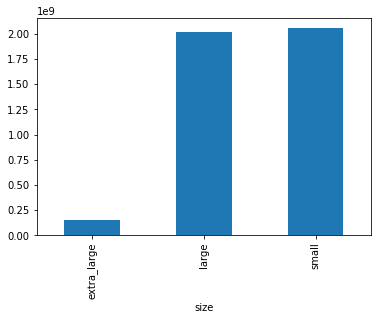

In [ ]:
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')
plt.show()

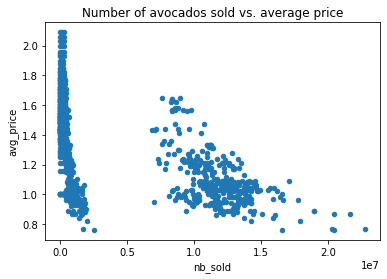

In [ ]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x='nb_sold', y= 'avg_price', kind ='scatter', 
title = 'Number of avocados sold vs. average price')

# Show the plot
plt.show()

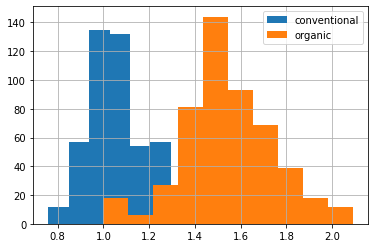

In [ ]:
# Histogram of conventional avg_price 
avocados[avocados['type']== 'conventional']['avg_price'].hist()


# Histogram of organic avg_price
avocados[avocados['type']=='organic']['avg_price'].hist()

# Add a legend
plt.legend(['conventional', 'organic'])

# Show the plot
plt.show()

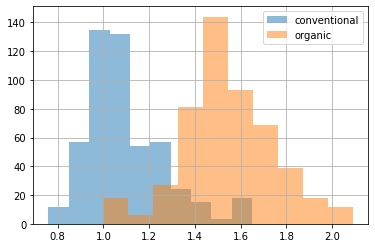

In [ ]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

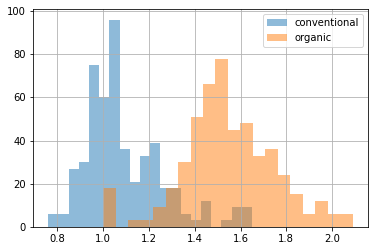

In [ ]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

## Missing values

In [ ]:
avocados_2016= avocados[avocados['year']==2016]
avocados_2016.head()

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94


In [ ]:
avocados_2016.isna()

,date,type,year,avg_price,size,nb_sold
52,False,False,False,False,False,False
53,False,False,False,False,False,False
54,False,False,False,False,False,False
55,False,False,False,False,False,False
56,False,False,False,False,False,False
...,...,...,...,...,...,...
944,False,False,False,False,False,False
945,False,False,False,False,False,False
946,False,False,False,False,False,False
947,False,False,False,False,False,False


In [ ]:
avocados_2016.isna().any().sum()

0

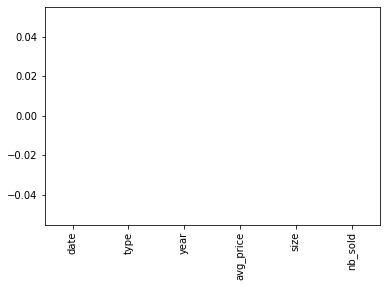

In [ ]:
avocados_2016.isna().sum().plot(kind='bar')
plt.show()

In [ ]:
# You can drop missing values by variable.dropna()
# Check then by variable.isna().any()

# List the columns with missing values
#cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
#avocados_2016[cols_with_missing].hist()

# Show the plot
#plt.show()

# From previous step
#cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
#avocados_2016[cols_with_missing].hist()
#plt.show()

# Fill in missing values with 0
#avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
#avocados_filled[cols_with_missing].hist()

# Show the plot
#plt.show()

## Creating DataFrames
* Dette kan gjøres på 2 måter. 
* Fra en liste av dictionaries - rad på rad
* Fra en dictionary av lister - kolonne på kolonne

In [ ]:
my_dict = { 
    'key1': 'value1',
    'key2': 'value2',
    'key3': 'value3'
    }

In [ ]:
 my_dict['key1']

'value1'

In [ ]:
#Måte 1
list_of_dicts = [
    {'name': 'Jan', 'Alder': '30', 'høyde': '181', 'kg':'80', 'bursdag': '12.sep'},
    {'name': 'Arne', 'Alder': '40', 'høyde': '183', 'kg':'100', 'bursdag': '13.sep'}
]

In [ ]:
ny_datasett = pd.DataFrame(list_of_dicts)
ny_datasett

,name,Alder,høyde,kg,bursdag
0,Jan,30,181,80,12.sep
1,Arne,40,183,100,13.sep


In [ ]:
#Måte 2:
dict_of_list = { 
    'name': ['Jan', 'Arne'], 'alder': ['30', '40'], 'høyde': ['181', '183'], 'bursdag': ['12.sep', '13.step']
    }
ny_datasett2 = pd.DataFrame(dict_of_list)
ny_datasett2 

,name,alder,høyde,bursdag
0,Jan,30,181,12.sep
1,Arne,40,183,13.step


In [ ]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [ ]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': '2019-11-03', 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


In [ ]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ['2019-11-17', '2019-12-01'],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019_1 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
avocados_2019_1

,date,small_sold,large_sold
0,2019-11-17,10859987,7674135
1,2019-12-01,9291631,6238096
